<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Assignment-7,-integrating-the-standard-atmospheres" data-toc-modified-id="Assignment-7,-integrating-the-standard-atmospheres-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Assignment 7, integrating the standard atmospheres</a></span><ul class="toc-item"><li><span><a href="#Read-soundings-into-pandas" data-toc-modified-id="Read-soundings-into-pandas-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Read soundings into pandas</a></span></li><li><span><a href="#Reuse-code-from-hydstatic_balance-notebook" data-toc-modified-id="Reuse-code-from-hydstatic_balance-notebook-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Reuse code from hydstatic_balance notebook</a></span><ul class="toc-item"><li><span><a href="#use-the-stem-of-the-filename-for-the-sound_dict-dictionary-keys" data-toc-modified-id="use-the-stem-of-the-filename-for-the-sound_dict-dictionary-keys-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>use the stem of the filename for the sound_dict dictionary keys</a></span></li><li><span><a href="#Plot--temp-and-vapor-mixing-ratio-rmix-($\rho_{H2O}/\rho_{air}$)" data-toc-modified-id="Plot--temp-and-vapor-mixing-ratio-rmix-($\rho_{H2O}/\rho_{air}$)-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Plot  temp and vapor mixing ratio rmix ($\rho_{H2O}/\rho_{air}$)</a></span></li></ul></li><li><span><a href="#Calculate-the-pressure-scale-height" data-toc-modified-id="Calculate-the-pressure-scale-height-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Calculate the pressure scale height</a></span></li><li><span><a href="#calculate-the-density-scale-height" data-toc-modified-id="calculate-the-density-scale-height-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>calculate the density scale height</a></span></li></ul></li><li><span><a href="#Assignment-7-questions-7a-and-7b" data-toc-modified-id="Assignment-7-questions-7a-and-7b-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Assignment 7 questions 7a and 7b</a></span><ul class="toc-item"><li><span><a href="#Question-7a----scale-height" data-toc-modified-id="Question-7a----scale-height-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Question 7a -- scale height</a></span></li><li><span><a href="#Question-7b,-water-vapor" data-toc-modified-id="Question-7b,-water-vapor-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Question 7b, water vapor</a></span></li></ul></li></ul></div>

# Assignment 7, integrating the standard atmospheres

This is an autograded notebook -- below I ask you to put your answers in two dictionaries
called solution_7a_dict and solution_7b_dict, and I'll compare your answers with
mine.

## Read soundings into pandas

There are five different average profiles for the tropics, subarctic summer, subarctic winter, midlatitude summer, midlatitude winter.  These are called the US Standard Atmospheres.  This notebook shows how to read and plot the soundings, and calculate the pressure and density scale heights.

In [1]:
from matplotlib import pyplot as plt
import matplotlib.ticker as ticks
import pdb
import numpy as np
import a301
from pprint import pprint,pformat
import pandas as pd
import json

## Reuse code from hydstatic_balance notebook

Read the csv files and make a dictionary called sound_dict to 
hold the dataframes

In [2]:
soundings_folder= a301.test_dir / Path('soundings')
sounding_files = list(soundings_folder.glob("*csv"))

### use the stem of the filename for the sound_dict dictionary keys

In [3]:
sound_dict={}
for item in sounding_files:
    sound_dict[item.stem]=pd.read_csv(item)
    print(f"{item.stem}\n"
          f"{sound_dict[item.stem].head()}")

tropics
   Unnamed: 0       z     press   temp     rmix     den         o3den
0           0     0.0  101300.0  300.0  0.01900  1.1670  5.600000e-08
1           1  1000.0   90400.0  294.0  0.01300  1.0640  5.600000e-08
2           2  2000.0   80500.0  288.0  0.00929  0.9689  5.400000e-08
3           3  3000.0   71500.0  284.0  0.00470  0.8756  5.100000e-08
4           4  4000.0   63300.0  277.0  0.00266  0.7951  4.700000e-08
subsummer
   Unnamed: 0       z     press   temp     rmix     den         o3den
0           0     0.0  101000.0  287.0  0.00910  1.2200  4.900000e-08
1           1  1000.0   89600.0  282.0  0.00600  1.1100  5.400000e-08
2           2  2000.0   79290.0  276.0  0.00420  0.9971  5.600000e-08
3           3  3000.0   70000.0  271.0  0.00269  0.8985  5.800001e-08
4           4  4000.0   61600.0  266.0  0.00165  0.8077  6.000000e-08
subwinter
   Unnamed: 0       z     press   temp      rmix     den         o3den
0           0     0.0  101300.0  257.1  0.001200  1.3720  4.1

We use these keys to get a dataframe with 6 columns, and 33 levels.  Here's an example for the midsummer sounding

In [4]:
midsummer=sound_dict['midsummer']
print(midsummer.head())
list(midsummer.columns)

   Unnamed: 0       z     press   temp     rmix     den         o3den
0           0     0.0  101300.0  294.0  0.01400  1.1910  6.000000e-08
1           1  1000.0   90200.0  290.0  0.00930  1.0800  6.000000e-08
2           2  2000.0   80200.0  285.0  0.00585  0.9757  6.000000e-08
3           3  3000.0   71000.0  279.0  0.00343  0.8846  6.200001e-08
4           4  4000.0   62800.0  273.0  0.00189  0.7998  6.400000e-08


['Unnamed: 0', 'z', 'press', 'temp', 'rmix', 'den', 'o3den']

### Plot  temp and vapor mixing ratio rmix ($\rho_{H2O}/\rho_{air}$)

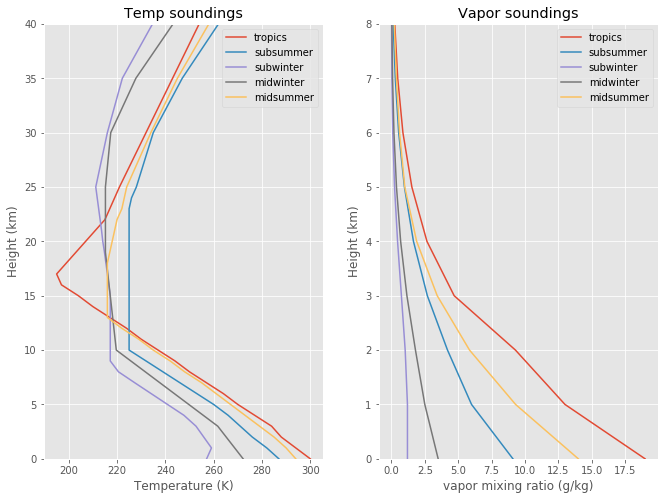

In [5]:
%matplotlib inline
plt.style.use('ggplot')
meters2km=1.e-3
plt.close('all')
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(11,8))
for a_name,df in sound_dict.items():
    ax1.plot(df['temp'],df['z']*meters2km,label=a_name)
    ax1.set(ylim=(0,40),title='Temp soundings',ylabel='Height (km)',
       xlabel='Temperature (K)')

    ax2.plot(df['rmix']*1.e3,df['z']*meters2km,label=a_name)
    ax2.set(ylim=(0,8),title='Vapor soundings',ylabel='Height (km)',
       xlabel='vapor mixing ratio (g/kg)')
ax1.legend()
_=ax2.legend()

## Calculate the pressure scale height

In [6]:
g=9.8  #don't worry about g(z) for this exercise
Rd=287.  #kg/m^3

def calcScaleHeight(df):
    """
    Calculate the pressure scale height H_p
    
    Parameters
    ----------
    
    df: dataframe with the following columns
    
    df['temp']: vector (float)
      temperature (K)
      
    df['z']: vector (float) of len(df)
      with the height in m
      
    Returns
    -------
     
    Hbar: vector (float) of len(df)
      pressure scale height (m)
    
    """
    z=df['z'].values
    Temp=df['temp'].values
    dz=np.diff(z)
    TLayer=(Temp[1:] + Temp[0:-1])/2.
    oneOverH=g/(Rd*TLayer)
    Zthick=z[-1] - z[0]
    oneOverHbar=np.sum(oneOverH*dz)/Zthick
    Hbar = 1/oneOverHbar
    return Hbar



## calculate the density scale height

In [7]:
def calcDensHeight(df):
    """
    Calculate the density scale height H_rho
    
    Parameters
    ----------
    
    df: dataframe with the following columns
    
    df['temp']: vector (float)
      temperature (K)
      
    df['z']: vector (float) of len(df)
      with the height in m
      
    Returns
    -------
    
    Hbar: vector (float) of len(T)
      density scale height (m)
    """
    z=df['z'].values
    Temp=df['temp'].values
    dz=np.diff(z)
    TLayer=(Temp[1:] + Temp[0:-1])/2.
    dTdz=np.diff(Temp)/np.diff(z)
    oneOverH=g/(Rd*TLayer) + (1/TLayer*dTdz)
    Zthick=z[-1] - z[0]
    oneOverHbar=np.sum(oneOverH*dz)/Zthick
    Hbar = 1/oneOverHbar
    return Hbar


<a name="oct7assign"></a>

# Assignment 7 questions 7a and 7b

## Question 7a -- scale height

a) Calculate the pressure scale height for each of the five atmospheres using calcScaleHeightFill the dictionary below (soution_7a_dict) with the five values you calculate using
calcScaleHeight.  (The answer you need is a trivial one liner -- this is mainly to demonstrate how
autograding works).

In [8]:
sound_names=list(sound_dict.keys())
dummy_answers=np.ones([len(sound_names)])*np.nan
solution_7a_dict=dict(zip(sound_names,dummy_answers))
print(f"here is the dictionary that will hold  your answers:\n " 
       f"{pformat(solution_7a_dict)}")

here is the dictionary that will hold  your answers:
 {'midsummer': nan,
 'midwinter': nan,
 'subsummer': nan,
 'subwinter': nan,
 'tropics': nan}


In [9]:
#
# set the top height at 10 km
# 
ztop = 10.e3  #meters
#
# loop through the dataframes,
# calling calcScaleHeight on each
# and saving the result in
# as an entry solution_7a_dict[name]
# i.e. if you pressure height is saved
# in the variable press_height, the last line in your loop should look
# like:
#
#  solution_7a_dict[name]=press_height
#
#
for name,df in sound_dict.items():
    #
    # limit the data frame to the heights below ztop
    #
    df = df.loc[df['z']<ztop]
    ### BEGIN SOLUTION
    press_height = calcScaleHeight(df)
    solution_7a_dict[name]=press_height
    print(f'{name}: {press_height:5.2f}')
    ### END SOLUTION   

tropics: 7963.18
subsummer: 7626.75
subwinter: 7055.06
midwinter: 7341.12
midsummer: 7868.38


In [10]:
### BEGIN HIDDEN TESTS
from numpy.testing import assert_allclose, assert_approx_equal
with open(a301.data_dir / 'assign7a_answers.json','r') as f:
    truth_dict=json.load(f)
    pprint(truth_dict)
    pprint(solution_7a_dict)
    for name,value in truth_dict.items():
        assert_approx_equal(solution_7a_dict[name],value,significant=4)
### END HIDDEN TESTS


{'midsummer': 7868.0,
 'midwinter': 7341.0,
 'subsummer': 7627.0,
 'subwinter': 7055.0,
 'tropics': 7963.0}
{'midsummer': 7868.383190898437,
 'midwinter': 7341.118088700389,
 'subsummer': 7626.7532408505285,
 'subwinter': 7055.061834157714,
 'tropics': 7963.184095997957}


## Question 7b, water vapor

2\.  Define a function calc_wv that takes a sounding dataframe and returns the "total precipitable water", which is defined as:

$$W = \int_0^{z_{top}} \rho_v dz $$

Do a change of units to convert $kg\,m^{-2}$ to $mm\,m^{-2}$ using the density of liquid water (1000 $kg\,m^{-3}$) -- that is, turn the kg of water in the 1 square meter column into cubic meters and turn that into $mm/m^{-2}$

To get a feel for the expected values, take a look at [this map](https://www.jpl.nasa.gov/spaceimages/details.php?id=PIA12096)

Store you answer for each sounding in the following dictionary called solution_7b_dict.  Limit your heights to z below 10 km as in question 7a.


In [11]:
sound_names=list(sound_dict.keys())
dummy_answers=np.ones([len(sound_names)])*np.nan
solution_7b_dict=dict(zip(sound_names,dummy_answers))
print(f"here is the dictionary that will hold  your answers:\n " 
       f"{pformat(solution_7b_dict)}")

here is the dictionary that will hold  your answers:
 {'midsummer': nan,
 'midwinter': nan,
 'subsummer': nan,
 'subwinter': nan,
 'tropics': nan}


In [16]:
def calc_wv(df):
    
    """
    Calculate the integrated column water content in mm
    
    Parameters
    ----------
    
    df: dataframe with the following columns
    
    df['rmix']: vector (float)
      vapor mixing ratio in kg/kg
      
    df['den']: vector (float) of len(df)
      the dry air density in kg/m^3
      
    df['z']: vector (float) of len(df)
       the height in m
      
    Returns
    -------
     
    col_wv: scalar (float)
       the column integrated water vapor in meters
    """
### BEGIN SOLUTION
    rhov = df['rmix'].values*df['den'].values
    mid_rhov = (rhov[1:] + rhov[:-1])/2.
    col_wv = np.sum(mid_rhov*np.diff(df['z'].values))
    #
    # convert kg/m^3 to meters, and meters to mm
    #
    col_wv = col_wv/1000.*1000.
    return col_wv

for name,df in sound_dict.items():
    top = 10.e3
    df = df.loc[df['z']<top]
    solution_7b_dict[name] = calc_wv(df)
    
with open(a301.test_dir / 'assign7b_answers.json','w') as f:
    json.dump(solution_7b_dict,f)
### END SOLUTION

In [15]:
### BEGIN HIDDEN TESTS
from numpy.testing import assert_allclose, assert_approx_equal
with open(a301.test_dir / 'assign7b_answers.json','r') as f:
    truth_dict=json.load(f)
    pprint(truth_dict)
    pprint(solution_7b_dict)
    for name,value in truth_dict.items():
        assert_approx_equal(solution_7b_dict[name],value,significant=4)
### END HIDDEN TESTS

{'midsummer': 30.104371717938058,
 'midwinter': 9.16804465939493,
 'subsummer': 21.454682991540004,
 'subwinter': 4.6946539649331,
 'tropics': 42.246106013}
{'midsummer': 30.104371717938058,
 'midwinter': 9.16804465939493,
 'subsummer': 21.454682991540004,
 'subwinter': 4.6946539649331,
 'tropics': 42.246106013}
